In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import datetime

In [100]:
# Getting the data from 'data.csv'
measurement_df = pd.read_csv('data.csv', names=['month','day','hour','sensor_humidity', 'sensor_temp', 'temp'])

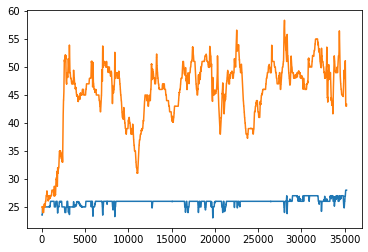

In [101]:
# Mean filtering
measurement_df['sensor_humidity_filtered'] = measurement_df['sensor_humidity'].rolling(30).mean()
measurement_df['sensor_temp_filtered'] = measurement_df['sensor_temp'].rolling(30).mean()
measurement_df = measurement_df[30:]
# Visualizing the data
plt.figure()
plt.plot(measurement_df['sensor_temp_filtered'])
plt.plot(measurement_df['sensor_humidity_filtered'])

In [187]:
measurement_df.corr()

month       day      hour  sensor_humidity  \
month                     1.000000 -0.390869 -0.063768         0.086650   
day                      -0.390869  1.000000  0.008447         0.416283   
hour                     -0.063768  0.008447  1.000000        -0.035156   
sensor_humidity           0.086650  0.416283 -0.035156         1.000000   
sensor_temp               0.240034  0.334222 -0.179440         0.159405   
temp                      0.050351  0.153724  0.169109         0.225672   
sensor_humidity_filtered  0.088953  0.418045 -0.037968         0.994849   
sensor_temp_filtered      0.250052  0.361633 -0.187833         0.172633   

                          sensor_temp      temp  sensor_humidity_filtered  \
month                        0.240034  0.050351                  0.088953   
day                          0.334222  0.153724                  0.418045   
hour                        -0.179440  0.169109                 -0.037968   
sensor_humidity              0.159405  0.225672                  0.994849   
sensor_temp                  1.000000  0.280345                  0.168486   
temp                         0.280345  1.000000                  0.227264   
sensor_humidity_filtered     0.168486  0.227264                  1.000000   
sensor_temp_filtered         0.909220  0.308873                  0.177289   

                          sensor_temp_filtered  
month                                 0.250052  
day                                   0.361633  
hour                                 -0.187833  
sensor_humidity                       0.172633  
sensor_temp                           0.909220  
temp                                  0.308873  
sensor_humidity_filtered              0.177289  
sensor_temp_filtered                  1.000000

In [188]:
# Putting data to dataframes and then splitting it for cross-validation
X = measurement_df[['month','hour','sensor_humidity_filtered', 'sensor_temp_filtered']]
y = measurement_df['temp']

X_train = X[:30000]
X_test = X[30001:]
y_train = y[:30000]
y_test = y[30001:]

In [189]:
# Here we do the regression model training
# The model is replaceble
regr = KNeighborsRegressor(n_neighbors=300)
regr.fit(X_train, y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=300, p=2,
                    weights='uniform')

In [190]:
# Predictions mse are calculated here for validation (I managed to get ~0.3 mse)
y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

3.137121394985799

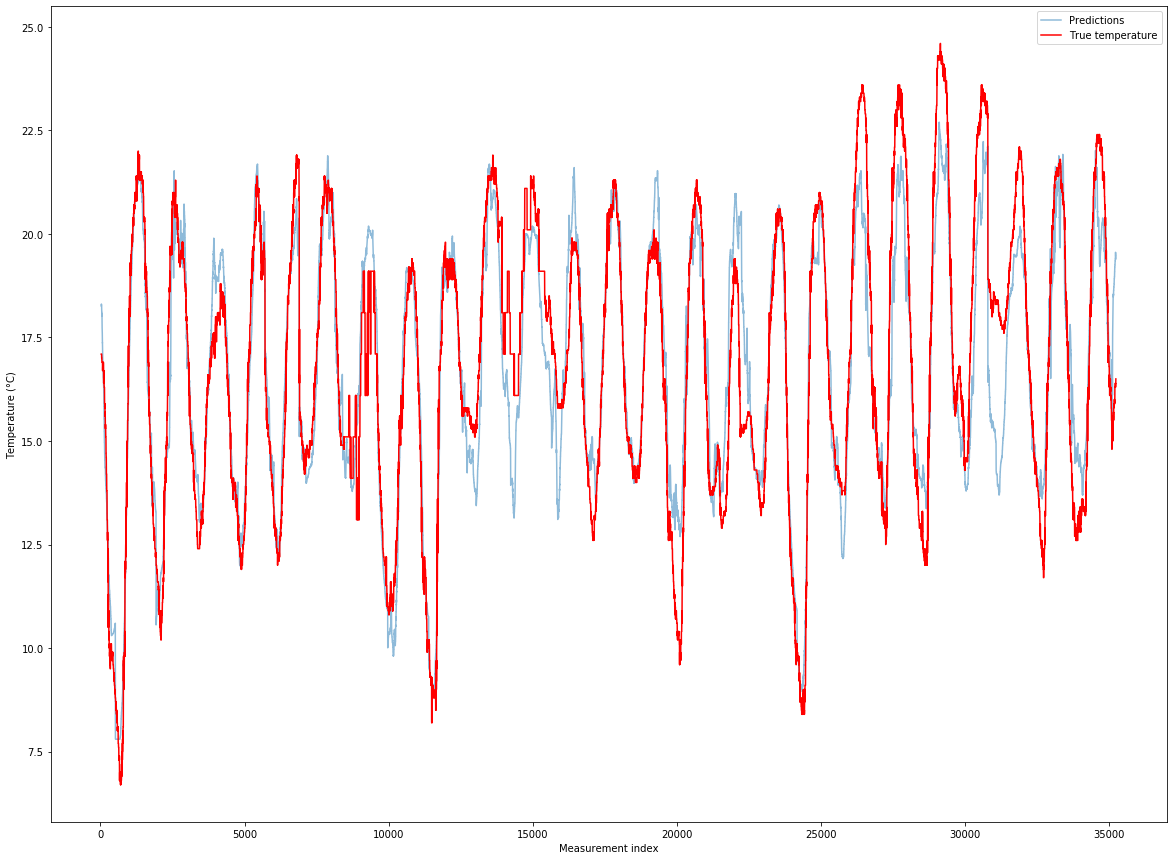

In [191]:
# Just plotting the predictions throughout the dataset to see how we did!
plt.figure(figsize=(20,15))
plt.plot(X.index, regr.predict(X), alpha=0.5, label='Predictions')
plt.plot(X.index, y, color='red', label='True temperature')
plt.xlabel("Measurement index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()